In [1]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [2]:
import pandas, numpy

In [3]:
input_file = '/Users/adrian/research/egilsstadir/results/deseq2/DESeq2_TPM_values_transcript.counts.tsv'

In [4]:
df = pandas.read_csv(input_file, sep='\t', index_col=0)
df

,C_17_18_1,C_17_18_2,C_17_18_3,C_17_42_1,C_17_42_2,C_17_42_3,C_KO1_63_1,C_KO1_63_2,C_KO1_63_3,C_WT_1,C_WT_2,C_WT_3
ENST00000308647.8,416.485774,436.314835,261.167941,292.536694,268.045679,265.380033,245.424507,255.319059,235.957283,303.705008,399.206204,226.599634
ENST00000378736.3,21.705856,27.746882,21.849002,13.478067,15.400302,15.689332,22.851975,12.157570,13.951331,15.758202,30.449399,19.297242
ENST00000472194.6,153.755567,196.842344,196.946209,221.433274,196.816712,186.894670,169.295570,111.193883,132.137027,174.988977,231.984831,158.403735
ENST00000474481.1,31.125930,44.861120,35.786966,61.729066,81.976149,59.292091,32.489262,27.600921,40.033291,35.828709,74.706813,42.833772
ENST00000485748.5,37.172483,55.200852,39.449515,45.858491,46.597696,46.130280,31.864033,53.237218,43.055226,35.900047,50.912994,30.170235
...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000619729.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENST00000612640.4,0.000000,4.684309,17.347599,12.478515,21.595714,12.444731,8.291219,28.761281,17.864296,8.562603,26.417882,9.123826
ENST00000614336.4,46.075503,69.058553,75.641872,45.802553,31.516693,35.456827,27.167898,21.726949,2.445931,29.045677,12.354623,21.033482
ENST00000601199.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
my_colors = ['gold', 'skyblue', 'tab:red', 'black']

In [6]:
# ATG7 201 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000354449.7' # 201, ATG7(1)
df.loc[target_gene, ]

C_17_18_1     5.459480e+01
C_17_18_2     7.724586e+01
C_17_18_3     1.075277e+01
C_17_42_1     5.465844e+01
C_17_42_2     1.061715e+01
C_17_42_3     6.672087e+01
C_KO1_63_1    6.593126e+01
C_KO1_63_2    4.705522e+01
C_KO1_63_3    7.971508e+01
C_WT_1        1.805950e+02
C_WT_2        1.436310e+02
C_WT_3        7.148194e-08
Name: ENST00000354449.7, dtype: float64

[54.59480247 77.24586113 10.75277128]
[54.65844271 10.61714685 66.72086815]
[65.93126432 47.05522404 79.71507837]
[1.80595048e+02 1.43630955e+02 7.14819359e-08]


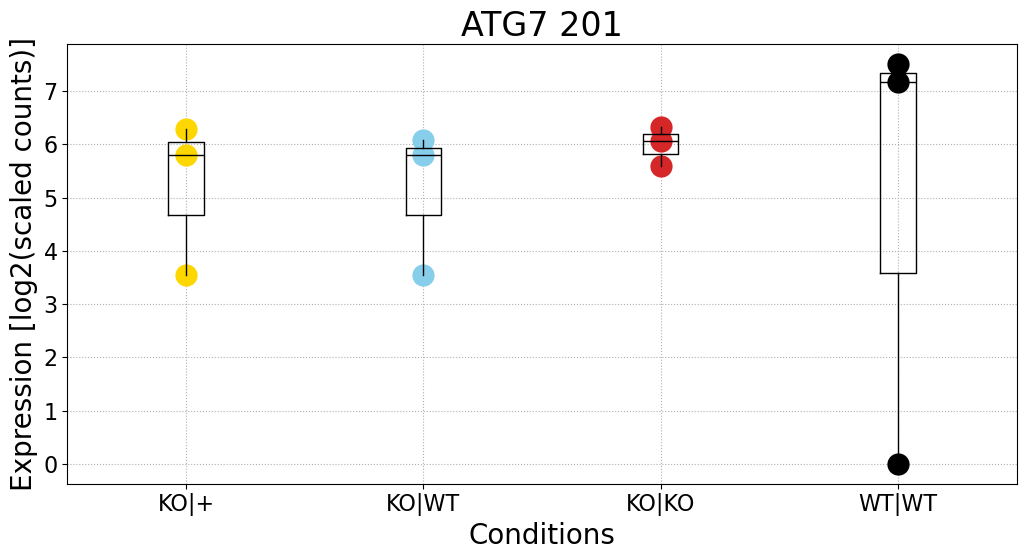

In [7]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
    print(tpm)
    tpm = numpy.log2(tpm+1)
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [log2(scaled counts)]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 201')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [8]:
# ATG7 202 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000354956.9' # 202, ATG7(2)
df.loc[target_gene, ]

C_17_18_1     251.665435
C_17_18_2     339.851927
C_17_18_3     260.748837
C_17_42_1      73.369089
C_17_42_2      94.170224
C_17_42_3      83.828496
C_KO1_63_1      0.000000
C_KO1_63_2     23.757715
C_KO1_63_3      0.000000
C_WT_1         85.610971
C_WT_2        107.455523
C_WT_3         74.153379
Name: ENST00000354956.9, dtype: float64

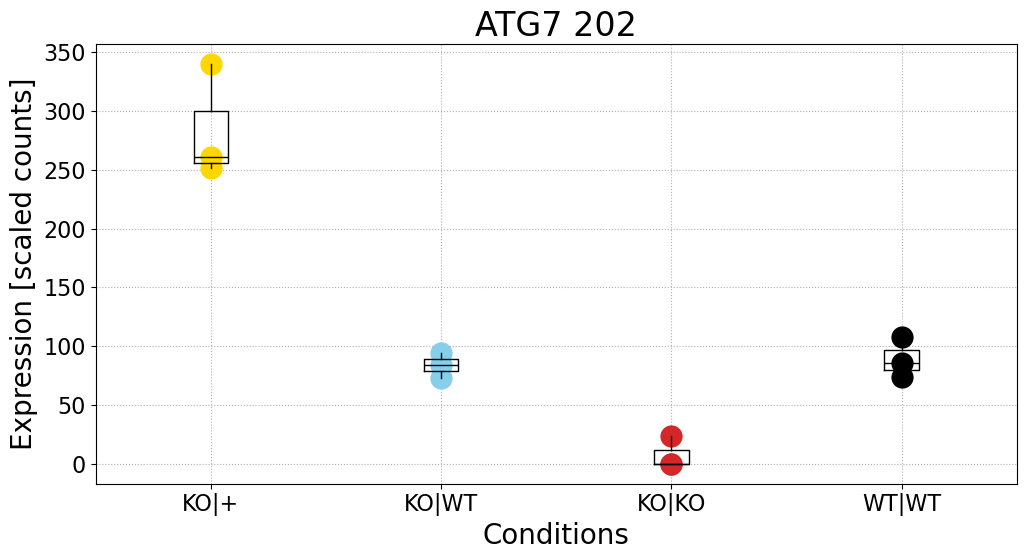

In [9]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [scaled counts]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 202')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [10]:
# ATG7 213 from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6158294/
target_gene = 'ENST00000446450.6' # 213, ATG7(3)
df.loc[target_gene, ]

C_17_18_1     7.845468
C_17_18_2     0.000000
C_17_18_3     0.000000
C_17_42_1     0.000000
C_17_42_2     2.767878
C_17_42_3     0.000000
C_KO1_63_1    0.000000
C_KO1_63_2    5.226014
C_KO1_63_3    0.000000
C_WT_1        0.000000
C_WT_2        0.000000
C_WT_3        7.234543
Name: ENST00000446450.6, dtype: float64

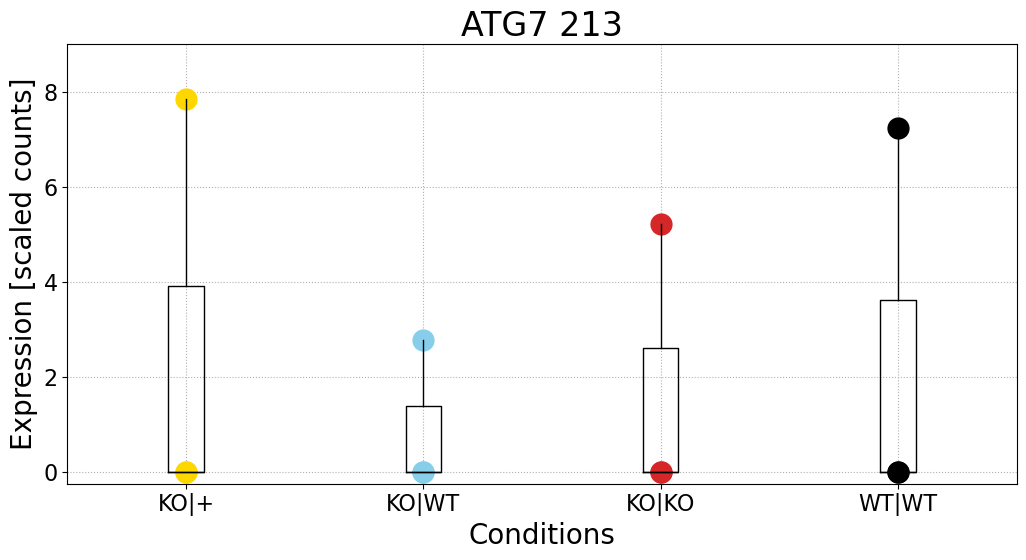

In [11]:
for group in range(4):
    initial = group * 3
    final = initial + 3
    tpm = df.loc[target_gene, ].iloc[initial:final].values
        
    matplotlib.pyplot.plot(numpy.repeat(group, len(tpm)), tpm, 'o', color=my_colors[group], alpha=3/3, mec='none', markersize=16)
    matplotlib.pyplot.boxplot(tpm, positions=[group], showcaps=False, medianprops=dict(color='black'))

matplotlib.pyplot.ylim([-0.25, 9])
matplotlib.pyplot.xticks([0, 1, 2, 3], ['KO|+', 'KO|WT', 'KO|KO', 'WT|WT'])
matplotlib.pyplot.ylabel('Expression [scaled counts]')
matplotlib.pyplot.xlabel('Conditions')
matplotlib.pyplot.title('ATG7 213')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()